### 浅复制

https://blog.csdn.net/weixin_38492159/article/details/107329691

**Creator method or [:] are *shallow copy* **
** Copied the out-most container, the reference to the origin conatiner **

** if the origin elements are immutable, there is no problem, even save the memory,
. But if thave mutable element, something is curious**


In [6]:
ls1 = [3,[55,44], (7,8,9)]
# ls2 = list(ls1)    # create a copy of ls1
ls2 = ls1[:]        # alternative way to create a copy of ls1
ls1, ls2

([3, [55, 44], (7, 8, 9)], [3, [55, 44], (7, 8, 9)])

In [7]:
ls2 ==ls1

True

In [8]:
ls2 is ls1    # but they are different objects

False

In [9]:
id(ls1), id(ls2)

(2405171667080, 2405163617736)


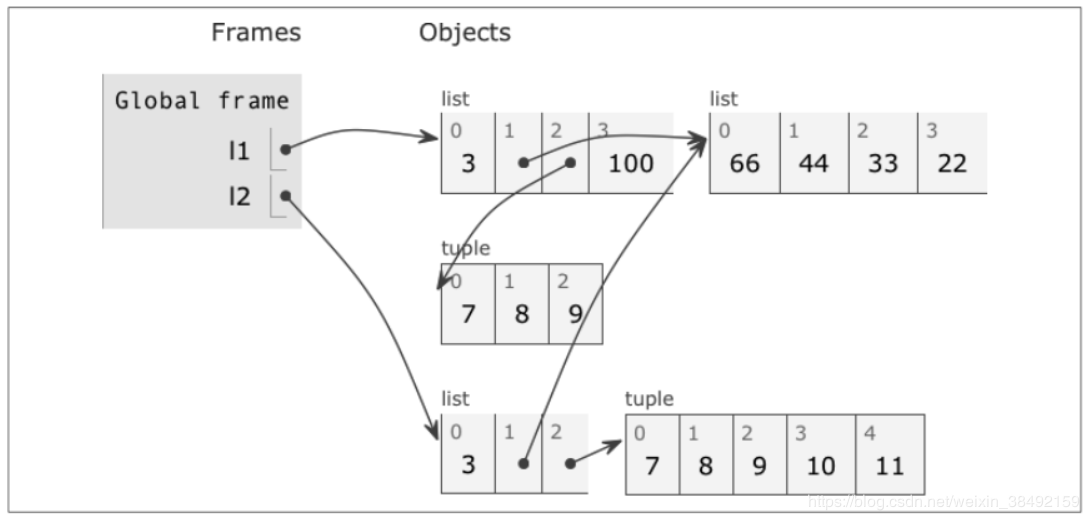

(1) 对可变的对象来说，如ls2[1]引用的列表，+=运算符就地修改列表。这次修改在ls1[1]中也有体现，因为它是ls2[1]的别名。
(2) 对元组来说，+=运算符创建一个新元组，然后重新绑定给变量ls2[2]。这等同于ls2[2] = ls2[2] + (10, 11)。现在，ls1和ls2中最后位置上的元组不是同一个对象。
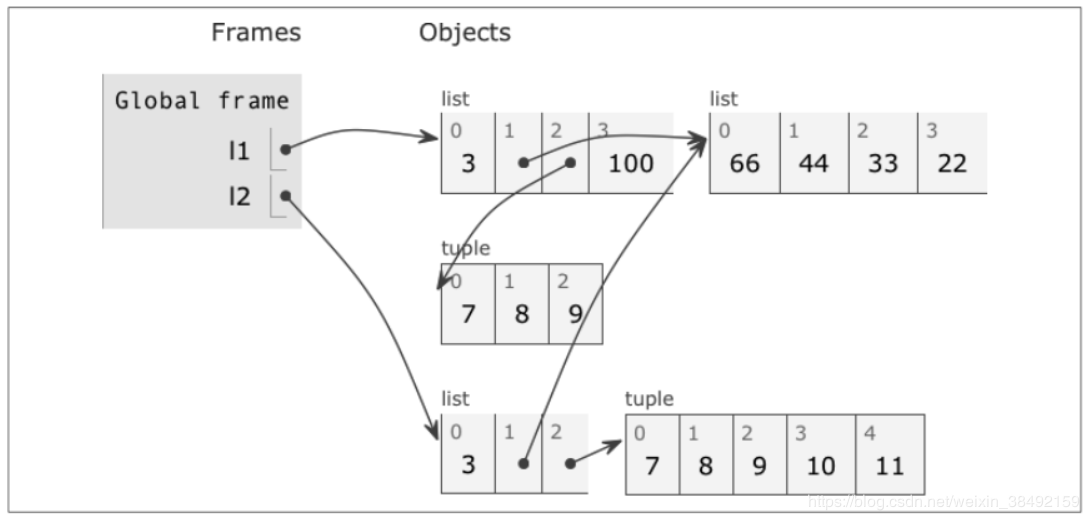
**ls1和ls2的最终状态**：二者依然引用同一个列表对象，现在列表的值是[66, 44, 33, 22]，不过l2[2] += (10, 11)创建一个新元组，内容是(7, 8, 9, 10, 11)，它与l1[2]引用的元组(7, 8, 9)无关。


In [12]:
ls1 = [3,[66,55,44], (7,8,9)]
ls2 = list(ls1)    # ls2 is a shallow copy of ls1
ls1.append(100)    # append 100 to ls1, NO EFFECT on ls2
ls1[1].remove(55)    # remove 55 from mutable list = ls1[1], HAVE EFFECT on ls2 BECAUSE ls2[1] and ls1[1] are the same list 
print('ls1:', ls1)
print('ls2', ls2)
ls2[1] += [33,22]     # (1)
ls2[2] += (10, 11)    # (2)
print('ls1:', ls1)
print('ls2', ls2)

ls1: [3, [66, 44], (7, 8, 9), 100]
ls2 [3, [66, 44], (7, 8, 9)]
ls1: [3, [66, 44, 33, 22], (7, 8, 9), 100]
ls2 [3, [66, 44, 33, 22], (7, 8, 9, 10, 11)]


### 为任意对象做深复制和浅复制

**copy模块提供的deepcopy和copy函数能为任意对象做深复制和浅复制。**



In [13]:
class Bus:
    def __init__(self, passengers = None):
        if passengers == None:
            self.passengers = []
        else:
            self.passengers = list(passengers)
    def pick(self, name):
        self.passengers.append(name)
    def drop(self, name):
        self.passengers.remove(name)




In [18]:
import copy
bus1 = Bus(['Alice', 'Bill', 'Claire', 'David'])
bus2 = copy.copy(bus1)
bus3 = copy.deepcopy(bus1)    
id(bus1), id(bus2), id(bus3)    # created three different instances
bus1.drop('Bill')    # bus2 is bus1's shallow copy
bus1.passengers, bus2.passengers, bus3.passengers    # bus3 is bus1 deepcopy, passengers are two different lists

(['Alice', 'Claire', 'David'],
 ['Alice', 'Claire', 'David'],
 ['Alice', 'Bill', 'Claire', 'David'])

### Pandas shallow and deep copy

https://blog.csdn.net/weixin_41004521/article/details/82782510?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522159471642819725222418641%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=159471642819725222418641&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v3~pc_rank_v3-1-82782510.pc_ecpm_v3_pc_rank_v3&utm_term=pandas+%E6%B5%85%E6%8B%B7%E8%B4%9D%2C%E6%B7%B1%E6%8B%B7%E8%B4%9D

In [1]:
import numpy as np

# shallow copy
a = np.arange(5)
b = a 
a[0] = 11
a, b

(array([11,  1,  2,  3,  4]), array([11,  1,  2,  3,  4]))

In [2]:
b == a


array([ True,  True,  True,  True,  True])

In [3]:
b is a

True

In [4]:
c = b
c is a

True

In [7]:
# deep copy
import numpy as np

a = np.arange(5)
b = a.copy()
b is a

False

In [10]:
a[0:5] = [11, 22,33,44,55]
a, b

(array([11, 22, 33, 44, 55]), array([0, 1, 2, 3, 4]))